**In this notebook I am using Gradient Boosting Classifier and Artificial Neural Networks for Gender Recognition**

In [8]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing dataset
voice = pd.read_csv('voice.csv')

**Lets take a quick look at the data**

In [ ]:
voice.head()

In [22]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [5]:
y = 1 * (voice['label'] == 'male')

In [39]:
X = voice.drop('label',axis = 1).values

In [40]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

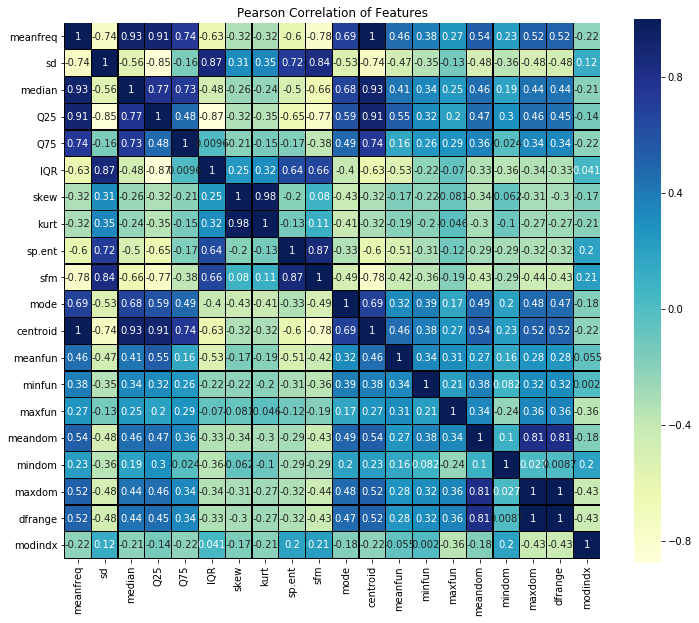

In [11]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(voice.drop('label', axis = 1).astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

**Using Gradient Boosting Classifier**

In [42]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
gbc = GBC(learning_rate = 0.01)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [43]:
y_pred = gbc.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy = ', end = "")
print((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))

[[438  14]
 [ 13 486]]
Accuracy = 0.971608832808


In [45]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = gbc, X = X, y = y, cv = 10, n_jobs = -1)
print('Accuracy =', accuracies.mean()*100, '%')
print('Standard Deviation =', accuracies.std()*100, '%')

Accuracy = 96.0253960672 %
Standard Deviation = 2.32891981124 %


**Using Artificial Neural Networks**

In [50]:
#Importing Libraries for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [53]:
#Initialisng the ANN
classifier = Sequential()

#Input Layer and First Hidden Layer
classifier.add(Dense(units = 32, activation = 'relu', input_dim = X.shape[1]))

#Adding the Second hidden layer
classifier.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Fitting ANN to the training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

In [56]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [57]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy = ', end = "")
print((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))

[[441  11]
 [ 10 489]]
Accuracy = 0.977917981073
